<a href="https://colab.research.google.com/github/omkart0124/Exploratory-Data-Analysis/blob/main/ITV_Review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("NLP CSV.csv", encoding="latin-1")
df.head()

,Name,Time,Train-Test Data,Review,Unnamed: 4
0,143Pallavi Karande,a month ago,New,I just attended the counselling session and it...,NaN
1,Abhinay Bhosale,2 months ago,New,Good Teaching staff with concepts cleared in t...,NaN
2,Adhithi Prabhu,3 months ago,Old,I joined IT Vedant for data science course.Tea...,NaN
3,Aditi Joshi,a year ago,Old,I have taken admission for python developer co...,NaN
4,Aditi Patade,a day ago,New,They've the best assistance anyone would recie...,NaN


In [ ]:
df.drop(["Unnamed: 4"],axis=1, inplace=True)
df.drop(["Name"],axis=1, inplace=True)
df.drop(["Time"],axis=1, inplace=True)

In [ ]:
df.head(2)

,Train-Test Data,Review
0,New,I just attended the counselling session and it...
1,New,Good Teaching staff with concepts cleared in t...


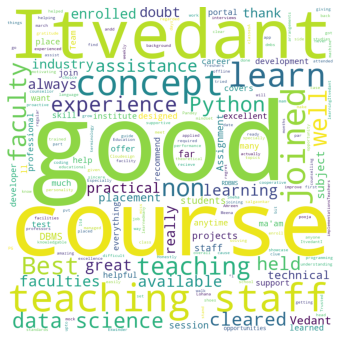

In [ ]:
wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10)#creating wordcloud object
wc.generate("".join(df[df['Train-Test Data']=='New']['Review']))
plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis("off")# turn off axis no need of axis
plt.show()

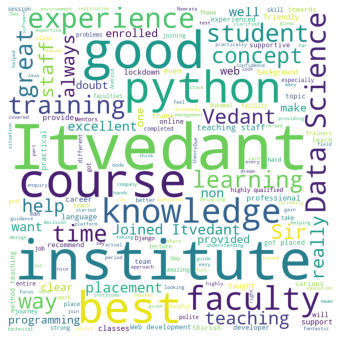

In [ ]:
wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10)#creating wordcloud object
wc.generate("".join(df[df['Train-Test Data']=='Old']['Review']))#Here we give some index and that index going to generate some image


plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis("off")# turn off axis no need of axis
plt.show()

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#d = df.apply(le.fit_transform,axis=0)
#df['Train-Test Data'] = le.fit_transform(df['Train-Test Data'])
#df['Review'] = le.fit_transform(df['Review'])

In [ ]:
stopword=stopwords.words('english')
punc=list(punctuation)

In [ ]:
stop=stopword+punc

In [ ]:
def clean_text(text):
  tokens=word_tokenize(text.lower())
  word_tokens=[x for x in tokens if x.isalpha()]
  clean_tokens=[x for x in word_tokens if x not in stop]
  lemma=WordNetLemmatizer()
  lemma_token=[lemma.lemmatize(t) for t in clean_tokens]
  return ' '.join(lemma_token)

In [ ]:
#def clean_text(text):
#  tokens = word_tokenize(text.lower())    # that converted into lower case
#  word_tokens = [t for t in tokens if t.isalpha()]   # this will help us to deal with pun. and no
#  clean_tokens = [t for t in word_tokens if t not in stop]# Remove stop words
#  lemma = WordNetLemmatizer()# Lemmitization it just handle plural
#  lemma_tokens = [lemma.lemmatize(t) for t in clean_tokens]

#  return " ".join(lemma_tokens)

In [ ]:
#def clean_text(text):
#  tokens=word_tokenize(text.lower())
#  word_tokens=[x for x in tokens if x.isalpha()]
#  clean_tokens=[x for x in word_tokens if x not in stop]
#  lemma=WordNetLemmatizer()
#  lemma_token=[lemma.lemmatize(t) for t in clean_tokens]
#  return ' '.join(lemma_token)
#def clean_text(text):
#  tokens = word_tokenize(text.lower())    # that converted into lower case
#  word_tokens = [t for t in tokens if t.isalpha()]   # this will help us to deal with pun. and no
#  clean_tokens = [t for t in word_tokens if t not in stop]# Remove stop words
#  lemma = WordNetLemmatizer()# Lemmitization it just handle plural
#  lemma_tokens = [lemma.lemmatize(t) for t in clean_tokens]

#  return " ".join(lemma_tokens)

In [ ]:
df['Review']=df['Review'].apply(clean_text)
df['Review']

0     attended counselling session par head counsell...
1     good teaching staff concept cleared first sess...
2     joined vedant data science non teaching staff ...
3     taken admission python developer course itveda...
4     best assistance anyone would recieve regarded ...
                            ...                        
69    joined itvedant december enrolled course web d...
70    joined python developer course itvedant andher...
71    good institute enhance skill encouraging mento...
72    itvedant one best software training institute ...
73    enrolled data science basic course itvedant th...
Name: Review, Length: 74, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

d = df.apply(le.fit_transform,axis=0)
df['Train-Test Data'] = le.fit_transform(df['Train-Test Data'])
#df['Review'] = le.fit_transform(df['Review'])

In [ ]:
x = df['Review']
y = df['Train-Test Data']

In [ ]:
#x= np.array(df[['Review']]).reshape(-1,1)
#y= np.array(df['Train-Test Data']).reshape(-1, 1)

In [ ]:
x.shape

(74,)

In [ ]:
x

0     attended counselling session par head counsell...
1     good teaching staff concept cleared first sess...
2     joined vedant data science non teaching staff ...
3     taken admission python developer course itveda...
4     best assistance anyone would recieve regarded ...
                            ...                        
69    joined itvedant december enrolled course web d...
70    joined python developer course itvedant andher...
71    good institute enhance skill encouraging mento...
72    itvedant one best software training institute ...
73    enrolled data science basic course itvedant th...
Name: Review, Length: 74, dtype: object

In [ ]:
#sent_len=[]
#for x in df['Review']:
#  sent_len.append(len(word_tokenize(x)))
#df['sent_len']=sent_len
#df.head()

In [ ]:
#np.quantile(sent_len,0.90)

In [ ]:
#max_len = 24

In [ ]:
##y.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [ ]:
sent_len=[]
for x in df['Review']:
  sent_len.append(len(word_tokenize(x)))
df['sent_len']=sent_len
df.head()

,Train-Test Data,Review,sent_len
0,0,attended counselling session par head counsell...,22
1,0,good teaching staff concept cleared first sess...,19
2,1,joined vedant data science non teaching staff ...,19
3,1,taken admission python developer course itveda...,16
4,0,best assistance anyone would recieve regarded ...,11


In [ ]:
np.quantile(sent_len,0.90)

24.0

In [ ]:
max_len = 24

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import (Dropout,LSTM,Embedding,SimpleRNN,GRU)

In [ ]:
Token=Tokenizer(char_level=False,split=' ')
Token.fit_on_texts(x_train)

In [ ]:
vocal_len=len(Token.index_word)
vocal_len

349

In [ ]:
seq_train=Token.texts_to_sequences(x_train)
seq_train

[[7, 5, 5, 31, 69, 125, 8, 9, 126, 2, 4, 13, 127, 128, 129, 32, 130, 131],
 [10,
  44,
  132,
  16,
  12,
  70,
  133,
  134,
  45,
  135,
  3,
  136,
  137,
  11,
  71,
  138,
  46,
  17,
  3,
  18,
  72],
 [3, 4, 33, 73, 19, 45, 70, 47, 48, 34, 139, 140, 20, 19, 141, 49, 142],
 [74, 31, 50, 143, 144, 145, 35, 146, 7, 147, 148, 25, 149, 3],
 [10, 44, 8, 9, 75, 7, 5, 150, 151, 76, 21, 36, 13, 6, 152, 153, 154, 76, 155],
 [156, 17, 37, 157, 51, 1, 52, 34, 38, 53, 16, 49, 158, 19, 45],
 [159,
  21,
  72,
  1,
  77,
  53,
  78,
  79,
  22,
  80,
  160,
  54,
  161,
  38,
  25,
  1,
  14,
  162,
  26,
  163,
  164,
  14,
  165,
  166],
 [37, 167, 168, 169, 1, 81, 170, 55, 171, 56],
 [44, 3, 4, 82, 27, 172, 83, 11, 84, 85, 86, 6, 173, 174, 175, 57],
 [33, 18, 4, 12, 176, 8, 9, 87, 177, 8, 9, 178, 33, 2, 1, 28, 14],
 [10,
  1,
  179,
  58,
  180,
  39,
  78,
  79,
  22,
  59,
  40,
  181,
  182,
  183,
  40,
  35,
  88,
  41,
  5],
 [18,
  31,
  89,
  25,
  7,
  5,
  90,
  91,
  27,
  184,
 

In [ ]:
seq_pad_train=sequence.pad_sequences(seq_train)
seq_pad_train

array([[  0,   0,   0, ...,  32, 130, 131],
       [  0,   0,   0, ...,   3,  18,  72],
       [  0,   0,   0, ..., 141,  49, 142],
       ...,
       [  0,   0,   0, ..., 342, 343,  19],
       [  0,   0,   0, ...,  15, 345, 346],
       [  0,   0,   0, ...,  13,  64,   6]], dtype=int32)

In [ ]:
seq_test=Token.texts_to_sequences(x_test)
seq_test

[[44, 34, 146, 7, 3, 160, 11, 198, 19, 15, 48, 29, 48, 3, 74],
 [103, 123, 12, 22, 17, 23, 84, 17, 27, 189, 19, 20, 311, 34],
 [13,
  96,
  1,
  81,
  137,
  137,
  259,
  31,
  207,
  24,
  38,
  123,
  81,
  259,
  48,
  26,
  159,
  25,
  37,
  220,
  1,
  15,
  130,
  90,
  2,
  100,
  87,
  33,
  18,
  21,
  13],
 [48, 7, 92, 18, 245, 19, 41],
 [21, 13, 23, 27, 24, 92, 27, 19, 13, 12, 8, 9, 21, 4, 3, 7, 5, 21, 92, 30],
 [10, 1, 22, 80, 2, 18, 7, 5, 113],
 [8, 9, 1, 4, 45, 70, 12, 11, 61, 253, 297, 176, 28, 55, 4],
 [18, 125, 106, 2, 32],
 [103, 12, 2, 1, 11, 77, 3, 304, 13, 12, 25, 3, 20, 183, 11, 106, 26, 147],
 [1, 15, 113, 36, 6, 2, 32, 11, 13, 303, 27, 15],
 [10, 1, 335, 39, 2, 12, 176, 36, 13, 1, 264, 84, 31, 92],
 [44, 34, 146, 7, 3, 160, 11, 198, 19, 15, 48, 29, 48, 3, 74],
 [3, 4, 262, 340, 102, 2, 77, 340, 17, 305],
 [4, 13, 7, 11, 297, 305, 74, 32, 14, 109, 110, 44, 259, 125, 26],
 [106, 317, 65, 1, 4, 77, 34, 123, 294, 160, 24, 259],
 [84,
  7,
  5,
  341,
  69,
  75,
 

In [ ]:
seq_test=Token.texts_to_sequences(x_test)
seq_test

[[44, 34, 146, 7, 3, 160, 11, 198, 19, 15, 48, 29, 48, 3, 74],
 [103, 123, 12, 22, 17, 23, 84, 17, 27, 189, 19, 20, 311, 34],
 [13,
  96,
  1,
  81,
  137,
  137,
  259,
  31,
  207,
  24,
  38,
  123,
  81,
  259,
  48,
  26,
  159,
  25,
  37,
  220,
  1,
  15,
  130,
  90,
  2,
  100,
  87,
  33,
  18,
  21,
  13],
 [48, 7, 92, 18, 245, 19, 41],
 [21, 13, 23, 27, 24, 92, 27, 19, 13, 12, 8, 9, 21, 4, 3, 7, 5, 21, 92, 30],
 [10, 1, 22, 80, 2, 18, 7, 5, 113],
 [8, 9, 1, 4, 45, 70, 12, 11, 61, 253, 297, 176, 28, 55, 4],
 [18, 125, 106, 2, 32],
 [103, 12, 2, 1, 11, 77, 3, 304, 13, 12, 25, 3, 20, 183, 11, 106, 26, 147],
 [1, 15, 113, 36, 6, 2, 32, 11, 13, 303, 27, 15],
 [10, 1, 335, 39, 2, 12, 176, 36, 13, 1, 264, 84, 31, 92],
 [44, 34, 146, 7, 3, 160, 11, 198, 19, 15, 48, 29, 48, 3, 74],
 [3, 4, 262, 340, 102, 2, 77, 340, 17, 305],
 [4, 13, 7, 11, 297, 305, 74, 32, 14, 109, 110, 44, 259, 125, 26],
 [106, 317, 65, 1, 4, 77, 34, 123, 294, 160, 24, 259],
 [84,
  7,
  5,
  341,
  69,
  75,
 

In [ ]:
seq_pad_test=sequence.pad_sequences(seq_test)
seq_pad_test

array([[  0,   0,   0, ...,  48,   3,  74],
       [  0,   0,   0, ...,  20, 311,  34],
       [ 13,  96,   1, ...,  18,  21,  13],
       ...,
       [  0,   0,   0, ..., 341,  32,  11],
       [  0,   0,   0, ..., 228,   7,  11],
       [  0,   0,   0, ..., 150, 289,  26]], dtype=int32)

In [ ]:
#ANN
model=Sequential()
model.add(Embedding(vocal_len+1,23,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(25,activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 24, 23)            8050      
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 25)                1225      
_________________________________________________________________
dense (Dense)                (None, 20)                520       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 9,816
Trainable params: 9,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
trained = model.fit(seq_pad_train,y_train,batch_size=35,epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 25ms/step - loss: 0.7093
Epoch 2/20
2/2 [==============================] - 0s 23ms/step - loss: 0.6381
Epoch 3/20
2/2 [==============================] - 0s 22ms/step - loss: 0.5805
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 0.5177
Epoch 5/20
2/2 [==============================] - 0s 22ms/step - loss: 0.4711
Epoch 6/20
2/2 [==============================] - 0s 26ms/step - loss: 0.4181
Epoch 7/20
2/2 [==============================] - 0s 21ms/step - loss: 0.3782
Epoch 8/20
2/2 [==============================] - 0s 22ms/step - loss: 0.3085
Epoch 9/20
2/2 [==============================] - 0s 22ms/step - loss: 0.2863
Epoch 10/20
2/2 [==============================] - 0s 22ms/step - loss: 0.2280
Epoch 11/20
2/2 [==============================] - 0s 21ms/step - loss: 0.1986
Epoch 12/20
2/2 [==============================] - 0s 21ms/step - loss: 0.1619
Epoch 13/20
2/2 [==============================] - 0s 23ms/st

In [ ]:
y_hat=model.predict(seq_pad_test)
#y_hat

In [ ]:
y_hat1=np.where(y_hat>=0.5,1,0)
#y_hat1

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

accuracy = (metrics.accuracy_score(y_test, y_hat1))
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.18      0.50      0.26         6
           1       0.85      0.55      0.67        31

    accuracy                           0.54        37
   macro avg       0.51      0.52      0.46        37
weighted avg       0.74      0.54      0.60        37



##LSTM

In [ ]:
model=Sequential()
model.add(Embedding(vocal_len+1,23,input_length=max_len,mask_zero=True))
model.add(LSTM(25,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
trained=model.fit(seq_pad_train,y_train,batch_size=35,epochs=30)
y_hat=model.predict(seq_pad_test)
y_hat1=np.where(y_hat>=0.5,1,0)
print(classification_report(y_test,y_hat1))

Epoch 1/30
2/2 [==============================] - 4s 34ms/step - loss: 0.6904
Epoch 2/30
2/2 [==============================] - 0s 33ms/step - loss: 0.6849
Epoch 3/30
2/2 [==============================] - 0s 31ms/step - loss: 0.6785
Epoch 4/30
2/2 [==============================] - 0s 37ms/step - loss: 0.6709
Epoch 5/30
2/2 [==============================] - 0s 37ms/step - loss: 0.6667
Epoch 6/30
2/2 [==============================] - 0s 35ms/step - loss: 0.6595
Epoch 7/30
2/2 [==============================] - 0s 34ms/step - loss: 0.6528
Epoch 8/30
2/2 [==============================] - 0s 32ms/step - loss: 0.6437
Epoch 9/30
2/2 [==============================] - 0s 35ms/step - loss: 0.6467
Epoch 10/30
2/2 [==============================] - 0s 32ms/step - loss: 0.6263
Epoch 11/30
2/2 [==============================] - 0s 32ms/step - loss: 0.6169
Epoch 12/30
2/2 [==============================] - 0s 32ms/step - loss: 0.6103
Epoch 13/30
2/2 [==============================] - 0s 34ms/st

##GRU

In [ ]:
model=Sequential()
model.add(Embedding(vocal_len+1,23,input_length=max_len,mask_zero=True))
model.add(GRU(15,activation='tanh'))
model.add(Dense(15,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')
trained=model.fit(seq_pad_train,y_train,batch_size=10,epochs=10)
y_hat=model.predict(seq_pad_test)
y_hat1=np.where(y_hat>=0.5,1,0)
print(classification_report(y_test,y_hat1))

Epoch 1/10
4/4 [==============================] - 4s 29ms/step - loss: 0.6906
Epoch 2/10
4/4 [==============================] - 0s 29ms/step - loss: 0.6835
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.6731
Epoch 4/10
4/4 [==============================] - 0s 32ms/step - loss: 0.6662
Epoch 5/10
4/4 [==============================] - 0s 32ms/step - loss: 0.6571
Epoch 6/10
4/4 [==============================] - 0s 31ms/step - loss: 0.6389
Epoch 7/10
4/4 [==============================] - 0s 32ms/step - loss: 0.6331
Epoch 8/10
4/4 [==============================] - 0s 30ms/step - loss: 0.6080
Epoch 9/10
4/4 [==============================] - 0s 31ms/step - loss: 0.5938
Epoch 10/10
4/4 [==============================] - 0s 32ms/step - loss: 0.5762
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      1.00      0.91        31

    accuracy                           0.84        37
 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
# Count Vectorization
# model already clean thats why we ignore stopwords
cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train)# we transform x_train
x_test_cv = cv.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()# DT using gini index by default
dt.fit(x_train_cv, y_train)
y_pred = dt.predict(x_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.85      0.74      0.79        31

    accuracy                           0.68        37
   macro avg       0.53      0.54      0.52        37
weighted avg       0.75      0.68      0.71        37



In [ ]:
tf = TfidfVectorizer()
x_train_tf = tf.fit_transform(x_train)# insted of cv we use object of tf
x_test_tf = tf.transform(x_test)

In [ ]:
x_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train_tf,y_train)
y_pred = dt.predict(x_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.86      0.81      0.83        31

    accuracy                           0.73        37
   macro avg       0.56      0.57      0.56        37
weighted avg       0.76      0.73      0.74        37



In [ ]:
# ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train_tf = x_train_tf.toarray()
x_test_tf = x_test_tf.toarray()

In [ ]:
model1 = Sequential()
model1.add(Dense(10, activation="relu", input_shape=(x_train_cv.shape[1], )))
model1.add(Dense(6, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer="adam")

model1.fit(x_train_tf, y_train, batch_size=55, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 423ms/step - loss: 0.6905
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 0.6880
Epoch 3/25
1/1 [==============================] - 0s 5ms/step - loss: 0.6856
Epoch 4/25
1/1 [==============================] - 0s 5ms/step - loss: 0.6834
Epoch 5/25
1/1 [==============================] - 0s 5ms/step - loss: 0.6813
Epoch 6/25
1/1 [==============================] - 0s 6ms/step - loss: 0.6792
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 0.6770
Epoch 8/25
1/1 [==============================] - 0s 7ms/step - loss: 0.6750
Epoch 9/25
1/1 [==============================] - 0s 7ms/step - loss: 0.6730
Epoch 10/25
1/1 [==============================] - 0s 9ms/step - loss: 0.6709
Epoch 11/25
1/1 [==============================] - 0s 12ms/step - loss: 0.6689
Epoch 12/25
1/1 [==============================] - 0s 5ms/step - loss: 0.6668
Epoch 13/25
1/1 [==============================] - 0s 6ms/step - loss:

In [ ]:
y_hat = model1.predict(x_test_cv)

In [ ]:
y_hat = np.where(y_hat >=0.5,1,0)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      0.84      0.83        31

    accuracy                           0.70        37
   macro avg       0.41      0.42      0.41        37
weighted avg       0.68      0.70      0.69        37

